In [2]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point

In [3]:
with open('../track_coverage_pub.json') as user_file:
  coverage_file = json.load(user_file)
print(coverage_file.keys())
print(len(coverage_file['crs']))
print(len(coverage_file['features']))
print(len(coverage_file['name']))
print(len(coverage_file['type']))

dict_keys(['crs', 'features', 'name', 'type'])
2
33210
11
17


In [17]:
(coverage_file['features'])[0]['geometry']['coordinates'][0][2][0]

73.65487540554724

In [45]:
AOT_medians = []
keys_contained_AOT = []
keys_not_contained_AOT = []
WV_medians = []
keys_contained_WV = []
keys_not_contained_WV = []
lat = []
lon = []
for i in range(len(coverage_file['features'])):
    if 'Retrieved AOT Median' in (coverage_file['features'][i])['properties']:
        AOT_medians.append(((coverage_file['features'][i])['properties'])['Retrieved AOT Median'])
        keys_contained_AOT.append(i)
    else:
        keys_not_contained_AOT.append(i)

    if 'Retrieved WV Median' in (coverage_file['features'][i])['properties']:
        WV_medians.append(((coverage_file['features'][i])['properties'])['Retrieved WV Median'])
        keys_contained_WV.append(i)
        lat.append((coverage_file['features'])[i]['geometry']['coordinates'][0][2][0])
        lon.append((coverage_file['features'])[i]['geometry']['coordinates'][0][2][1])
    else:
        keys_not_contained_WV.append(i)



In [46]:
print(len(lat))
print(len(lon))

33035
33035


In [47]:
print('keys contained: ', len(keys_contained_AOT))
print('keys not contained: ', len(keys_not_contained_AOT))
print ('total scenes: ', len(keys_contained_AOT) + len(keys_not_contained_AOT))

keys contained:  33035
keys not contained:  175
total scenes:  33210


In [48]:
print('keys contained: ', len(keys_contained_WV))
print('keys not contained: ', len(keys_not_contained_WV))
print ('total scenes: ', len(keys_contained_WV) + len(keys_not_contained_WV))

keys contained:  33035
keys not contained:  175
total scenes:  33210


Text(0, 0.5, 'Frequency')

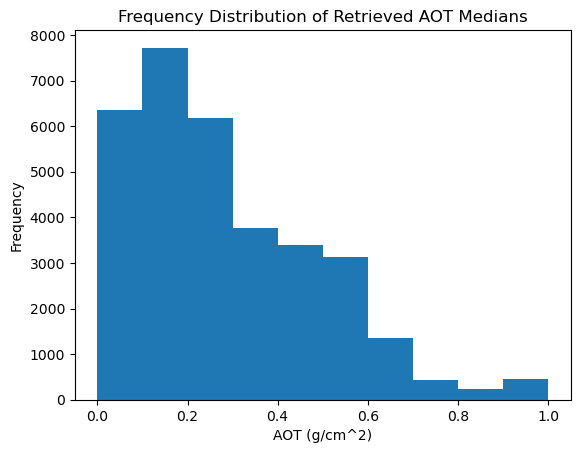

In [49]:
AOT_medians = np.array(AOT_medians)
plt.hist(AOT_medians)
plt.title('Frequency Distribution of Retrieved AOT Medians')
plt.xlabel('AOT (g/cm^2)')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

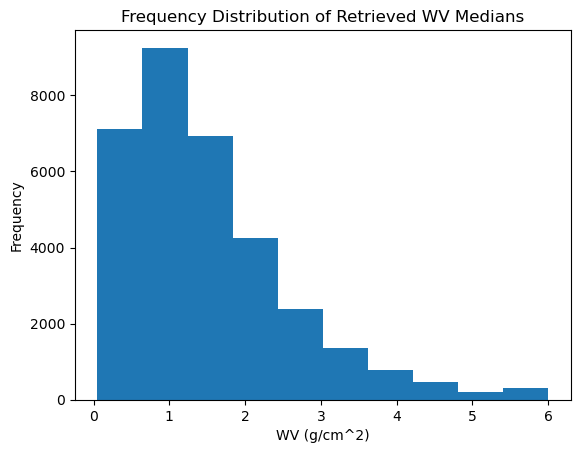

In [50]:
WV_medians = np.array(WV_medians)
plt.hist(WV_medians)
plt.title('Frequency Distribution of Retrieved WV Medians')
plt.xlabel('WV (g/cm^2)')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

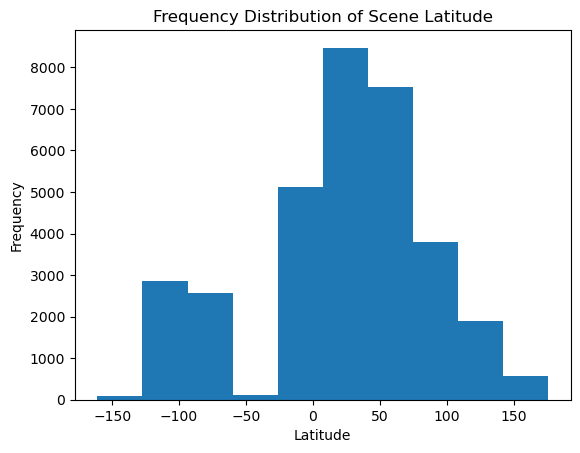

In [51]:
lat = np.array(lat)
plt.hist(lat)
plt.title('Frequency Distribution of Scene Latitude')
plt.xlabel('Latitude')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

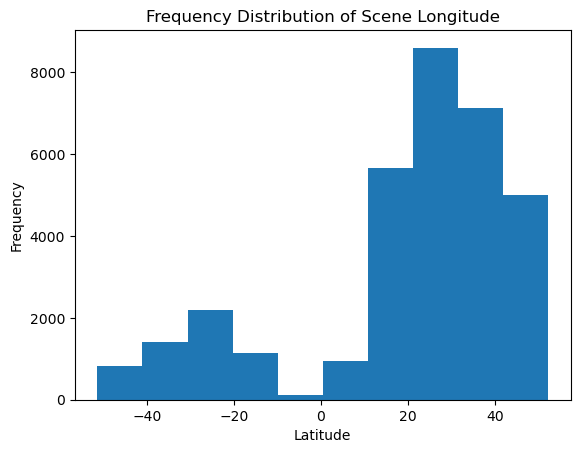

In [52]:
lon = np.array(lon)
plt.hist(lon)
plt.title('Frequency Distribution of Scene Longitude')
plt.xlabel('Latitude')
plt.ylabel('Frequency')

In [53]:
print(max(lat))
print(min(lat))
print(max(lon))
print(min(lon))

175.92536644287395
-161.08090312154843
52.20550240644183
-51.403231193389935


In [57]:
df = pd.DataFrame(lat, columns=['Latitude'])
df['Longitude'] = lon
df['WV'] = WV_medians

In [59]:
df.head()

,Latitude,Longitude,WV
0,73.654875,22.342299,0.24
1,74.160097,22.914315,0.09
2,74.669581,23.484342,0.12
3,75.183939,24.052386,0.08
4,75.703024,24.618323,3.88


C:\Users\vpatro\AppData\Local\Temp\ipykernel_20168\2779646783.py:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


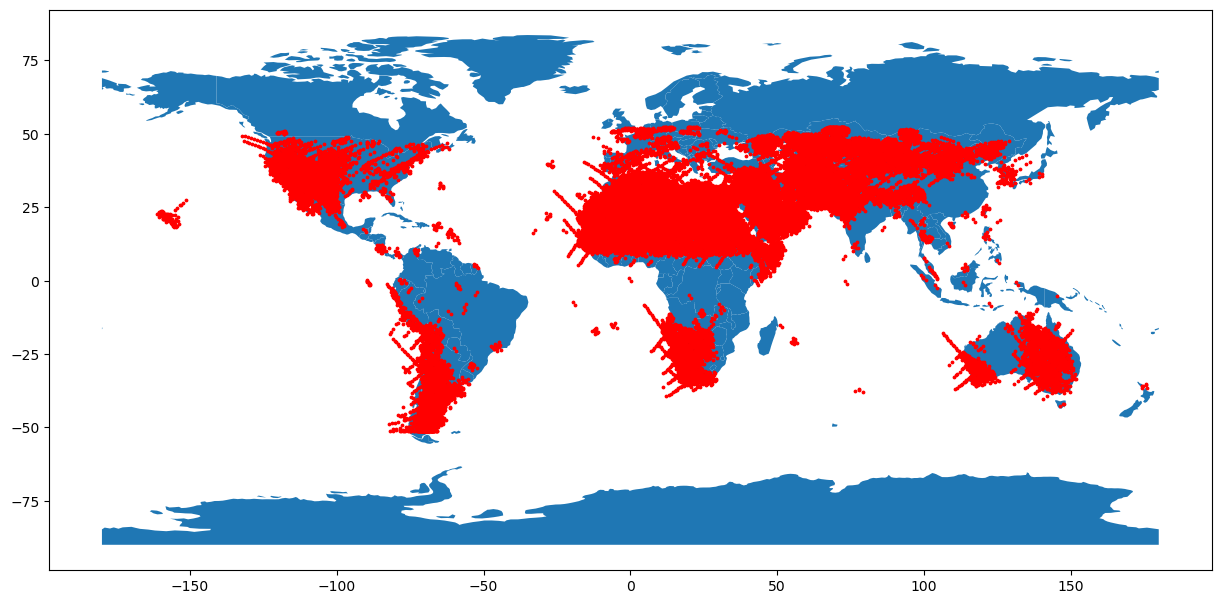

In [61]:
geometry = [Point(xy) for xy in zip(df['Latitude'], df['Longitude'])]
gdf = GeoDataFrame(df, geometry = geometry)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax = world.plot(figsize = (15,15)), marker = 'o', color = 'red', markersize = 3);

In [ ]:
title = 'Global Map of Atmospheric WV Medians for EMIT Scenes'